In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_regression
import pandas as pd
from sklearn import metrics ,tree,neighbors
from sklearn.metrics import classification_report , confusion_matrix

Read data

In [ ]:
my_data = pd.read_csv('/content/diabetes.csv')

drop duplicated row

In [ ]:
my_data=my_data.drop_duplicates()

handle null value

In [ ]:
def drop_columns_with_high_null_percentage(df, threshold=0.7):

    # Calculate the null percentage for each column
    null_percentage = df.isnull().mean()

    # Identify columns with null percentage exceeding the threshold
    columns_to_drop = null_percentage[null_percentage > threshold].index.tolist()


    # Drop the identified columns
    df_dropped = df.drop(columns=columns_to_drop)


    for column in df_dropped.columns:
        if df_dropped[column].dtype == 'object':
           # For categorical columns, fill with the mode
           mode_value = df_dropped[column].mode()[0]
           df_dropped[column].fillna(mode_value, inplace=True)
        else:
           # For numeric columns, fill with the mean
           mean_value = df_dropped[column].mean()
           df_dropped[column].fillna(mean_value, inplace=True)



    return df_dropped
my_data = drop_columns_with_high_null_percentage(my_data)

Define numerical columns

In [ ]:
numerical_columns = my_data.select_dtypes(include=['int64', 'float64']).columns

handle outliers

In [ ]:
for i in numerical_columns:
    Q1 :float = my_data[i].quantile(0.25)
    Q3:float = my_data[i].quantile(0.75)
    IQR = Q3 - Q1
    up_limit:float = Q3 + 1.5 * IQR
    low_limit:float = Q1 - 1.5 * IQR
    my_data.loc[my_data[i] > up_limit, i] :float= up_limit
    my_data.loc[my_data[i] < low_limit, i] :float= low_limit


In [ ]:
numerical_columns= numerical_columns.delete(-1)

split data into feature and target

In [ ]:
x = my_data.drop(columns=['Outcome'])
y = my_data['Outcome']



feature scaling

In [ ]:
x_normalizer = StandardScaler()
x_norm =x_normalizer.fit_transform(x)

spliting data into training and test

In [ ]:


x_train,x_test ,y_train ,y_test =train_test_split(x_norm,y,test_size=0.35,random_state=42,stratify=y)




feature selection

In [ ]:
k_best_selector = SelectKBest(score_func=f_regression, k=8)
x_train = k_best_selector.fit_transform(x_train, y_train)
x_test = k_best_selector.transform(x_test)

KNN Model

In [ ]:
knn_model = neighbors.KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train,y_train)

y_pred= knn_model.predict(x_test)

Evalute the model

The Accuracy for KNN: 0.77
classification report 
               precision    recall  f1-score   support

         0.0       0.80      0.87      0.83       175
         1.0       0.71      0.59      0.64        94

    accuracy                           0.77       269
   macro avg       0.75      0.73      0.74       269
weighted avg       0.76      0.77      0.76       269



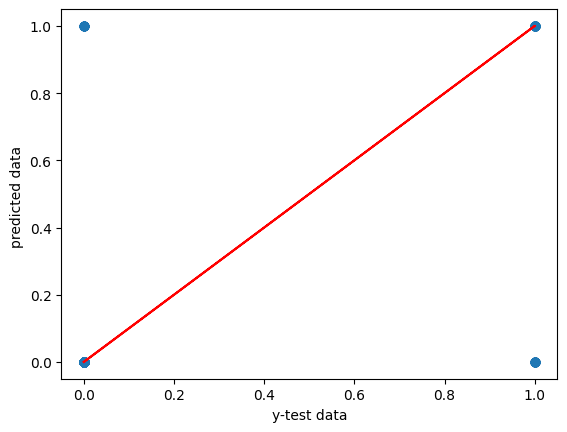

In [ ]:
print(f"The Accuracy for KNN: {metrics.accuracy_score(y_test, y_pred):.2f}")

report = classification_report(y_test ,y_pred)

print ("classification report \n" , report)



plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('y-test data')
plt.ylabel('predicted data ')
plt.show()